## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
%matplotlib inline

## Load training dataset from csv file

In [2]:
dataset = pd.read_csv('training_set.csv')
dataset = dataset.iloc[:, 1:]

## Separate features and classes

In [3]:
features = dataset.iloc[:, :-1]
classes = dataset.iloc[:, -1]
# features.columns

## Feature selection

In [4]:
sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear'))
sel_.fit(features.values, classes.values)
unwanted_features = features.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]

refined_features = features.drop(unwanted_features, axis=1, inplace=False)

## Scaling of data

In [5]:
sc = StandardScaler()
features_sc = sc.fit_transform(refined_features.values)

## Dimension reduction using PCA

In [6]:
train_score = []
validation_score = []
k_vals = []
for i in range(2, 50):
    k_vals.append(i)
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(features_sc)
    X_train, X_validate, y_train, y_validate = train_test_split(X_pca, classes.values, test_size = 0.20, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    
    tr_score = classifier.score(X_train, y_train)
    train_score.append(tr_score)
    
    val_score = classifier.score(X_validate, y_validate)
    validation_score.append(val_score)
    y_pred = classifier.predict(X_validate)

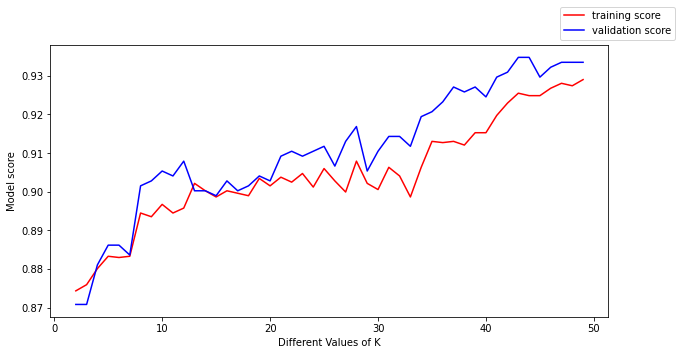

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, validation_score, color = 'b', label = 'validation score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## Conclusion
* As shown in above graph both training and validation score is increasing w.r.t to number of dimensions in PCA.
* So we need not apply PCA and go ahead with all the features available